<a href="https://colab.research.google.com/github/quinwatson/trading-performance-dashboard/blob/main/trades_clean_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving trades_raw.csv to trades_raw.csv


{'trades_raw.csv': b'date,,bias,reason_for_entry,instrument,entry_price,stop_price,target_price,exit_price,r_result,equity_r,notes,WIN RATE:,0.49\r\n1/8/2025,#VALUE!,neutral,"SMT of data lows, IFVG, DOL",ES,6310.75,6302.25,6323,6323,1.441176471,1.441176471,good trade following strategy,TOTAL TRADES:,100\r\n1/8/2025,,bearish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23120.5,23174,23031.5,23031.5,1.663551402,1.663551402,good trade following strategy and risk management moving stops to BE after internal lows,TOTAL R:,8.213739846\r\n4/8/2025,,bullish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23057,23039.25,23078,23078,1.183098592,1.183098592,good trade following strategy ,MAX DRAWDOWN (R):,-6\r\n5/8/2025,,bullish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23385.75,23326,23462,23326,-1,-1,"systematic loss, still followed strategy ",100-TRADE COMPLETION:,100/100\r\n6/8/2025,,neutral,"SMT divergence, HTF imbalance, IFVG, targeting equilibrium of 1hr range",E

In [2]:
import os
os.listdir(".")

['.config', 'trades_raw.csv', 'sample_data']

In [3]:
import pandas as pd

df = pd.read_csv("trades_raw.csv")
df.head()

,date,Unnamed: 1,bias,reason_for_entry,instrument,entry_price,stop_price,target_price,exit_price,r_result,equity_r,notes,WIN RATE:,0.49
0,1/8/2025,#VALUE!,neutral,"SMT of data lows, IFVG, DOL",ES,6310.75,6302.25,6323.00,6323.0,1.441176,1.441176,good trade following strategy,TOTAL TRADES:,100
1,1/8/2025,NaN,bearish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23120.50,23174.00,23031.50,23031.5,1.663551,1.663551,good trade following strategy and risk managem...,TOTAL R:,8.213739846
2,4/8/2025,NaN,bullish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23057.00,23039.25,23078.00,23078.0,1.183099,1.183099,good trade following strategy,MAX DRAWDOWN (R):,-6
3,5/8/2025,NaN,bullish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23385.75,23326.00,23462.00,23326.0,-1.000000,-1.000000,"systematic loss, still followed strategy",100-TRADE COMPLETION:,100/100
4,6/8/2025,NaN,neutral,"SMT divergence, HTF imbalance, IFVG, targeting...",ES,6324.25,6315.50,6345.75,6324.5,0.028571,0.028571,stopped out break even after internal highs we...,100-TRADE PROGRESS:,1


In [4]:
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

print("Invalid dates:", df["date"].isna().sum())

df = df.sort_values("date")

df.head()

Invalid dates: 72


,date,Unnamed: 1,bias,reason_for_entry,instrument,entry_price,stop_price,target_price,exit_price,r_result,equity_r,notes,WIN RATE:,0.49
0,2025-08-01,#VALUE!,neutral,"SMT of data lows, IFVG, DOL",ES,6310.75,6302.25,6323.00,6323.0,1.441176,1.441176,good trade following strategy,TOTAL TRADES:,100
1,2025-08-01,NaN,bearish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23120.50,23174.00,23031.50,23031.5,1.663551,1.663551,good trade following strategy and risk managem...,TOTAL R:,8.213739846
2,2025-08-04,NaN,bullish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23057.00,23039.25,23078.00,23078.0,1.183099,1.183099,good trade following strategy,MAX DRAWDOWN (R):,-6
3,2025-08-05,NaN,bullish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23385.75,23326.00,23462.00,23326.0,-1.000000,-1.000000,"systematic loss, still followed strategy",100-TRADE COMPLETION:,100/100
4,2025-08-06,NaN,neutral,"SMT divergence, HTF imbalance, IFVG, targeting...",ES,6324.25,6315.50,6345.75,6324.5,0.028571,0.028571,stopped out break even after internal highs we...,100-TRADE PROGRESS:,1


In [5]:
df = df.drop(columns=["Unnamed: 1"])

In [6]:
df.head()

,date,bias,reason_for_entry,instrument,entry_price,stop_price,target_price,exit_price,r_result,equity_r,notes,WIN RATE:,0.49
0,2025-08-01,neutral,"SMT of data lows, IFVG, DOL",ES,6310.75,6302.25,6323.00,6323.0,1.441176,1.441176,good trade following strategy,TOTAL TRADES:,100
1,2025-08-01,bearish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23120.50,23174.00,23031.50,23031.5,1.663551,1.663551,good trade following strategy and risk managem...,TOTAL R:,8.213739846
2,2025-08-04,bullish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23057.00,23039.25,23078.00,23078.0,1.183099,1.183099,good trade following strategy,MAX DRAWDOWN (R):,-6
3,2025-08-05,bullish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23385.75,23326.00,23462.00,23326.0,-1.000000,-1.000000,"systematic loss, still followed strategy",100-TRADE COMPLETION:,100/100
4,2025-08-06,neutral,"SMT divergence, HTF imbalance, IFVG, targeting...",ES,6324.25,6315.50,6345.75,6324.5,0.028571,0.028571,stopped out break even after internal highs we...,100-TRADE PROGRESS:,1


In [7]:
df["date"].head(10)

,date
0,2025-08-01
1,2025-08-01
2,2025-08-04
3,2025-08-05
4,2025-08-06
5,2025-08-06
6,2025-08-07
7,2025-08-08
8,2025-08-11
9,2025-08-12


In [8]:
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y", errors="coerce")

print("Invalid dates:", df["date"].isna().sum())

Invalid dates: 72


In [9]:
df[df["date"].isna()]

,date,bias,reason_for_entry,instrument,entry_price,stop_price,target_price,exit_price,r_result,equity_r,notes,WIN RATE:,0.49
10,NaT,neutral,"SMT divergence, IFVG, DOL (unmitiged HTF imbal...",NQ,23994.00,24006.75,23977.00,24006.75,-1.000000,-1.000000,systematic loss,NaN,NaN
11,NaT,bullish,"SMT of HTF imbalance, liquidity sweep of data ...",ES,6466.75,6449.50,6491.75,6487.25,1.188406,1.188406,closed early as NQ took out target price,NaN,NaN
12,NaT,bearish,"Bias, SMT of HTF highs, SMT of data highs, IFV...",NQ,23901.00,23913.00,23885.00,23913.00,-1.000000,-1.000000,systematic loss,NaN,NaN
13,NaT,bearish,"Bias, SMT of HTF highs, SMT of data highs, IFV...",NQ,23905.00,23915.50,23885.00,23889.00,1.523810,1.523810,closed early as ES took out data lows first,NaN,NaN
14,NaT,neutral,"SMT of HTF lows, IFVG, DOL (unmitigated HTF im...",NQ,23788.00,23764.50,23816.25,23764.50,-1.000000,-1.000000,systematic loss,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.dropna(subset=["date"])

In [11]:
df = df.dropna(how="all")

In [12]:
df = df.reset_index(drop=True)

In [13]:
df["date"].isna().sum()
df.tail()

,date,bias,reason_for_entry,instrument,entry_price,stop_price,target_price,exit_price,r_result,equity_r,notes,WIN RATE:,0.49
40,2025-11-10,bullish,"Bias, HTF imbalance, SMT divergence, IFVG, DOL",NQ,25542.25,25520.0,25569.50,25520.00,-1.000000,-1.000000,wicked out,NaN,NaN
41,2025-11-10,bullish,"Bias, HTF imbalance, SMT divergence, IFVG, DOL",NQ,25543.75,25528.0,25569.50,25528.00,-1.000000,-1.000000,systematic loss,NaN,NaN
42,2025-11-12,bullish,"Bias, SMT divergence out of HTF imbalance, IFV...",ES,6896.50,6894.5,6900.50,6894.50,-1.000000,-1.000000,systematic loss,NaN,NaN
43,2025-11-12,neutral,"SMT divergence, IFVG, DOL (unmitiged HTF imbal...",NQ,25793.75,25805.5,25777.75,25777.75,1.361702,1.361702,good trade following system,NaN,NaN
44,2025-11-12,bullish,"Bias, SMT divergence out of HTF imbalance, IFV...",NQ,25801.75,25792.0,25830.00,25792.00,-1.000000,-2.000000,systematic loss,NaN,NaN


In [14]:
df.columns

Index(['date', 'bias', 'reason_for_entry', 'instrument', 'entry_price',
       'stop_price', 'target_price', 'exit_price', 'r_result', 'equity_r',
       'notes', 'WIN RATE:', '0.49'],
      dtype='object')

In [15]:
df = df.drop(columns=["WIN RATE:"])

In [16]:
df.columns

Index(['date', 'bias', 'reason_for_entry', 'instrument', 'entry_price',
       'stop_price', 'target_price', 'exit_price', 'r_result', 'equity_r',
       'notes', '0.49'],
      dtype='object')

In [17]:
df.drop(columns=["0.49"])

,date,bias,reason_for_entry,instrument,entry_price,stop_price,target_price,exit_price,r_result,equity_r,notes
0,2025-08-01,neutral,"SMT of data lows, IFVG, DOL",ES,6310.75,6302.25,6323.00,6323.0000,1.441176,1.441176,good trade following strategy
1,2025-08-01,bearish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23120.50,23174.00,23031.50,23031.5000,1.663551,1.663551,good trade following strategy and risk managem...
2,2025-08-04,bullish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23057.00,23039.25,23078.00,23078.0000,1.183099,1.183099,good trade following strategy
3,2025-08-05,bullish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23385.75,23326.00,23462.00,23326.0000,-1.000000,-1.000000,"systematic loss, still followed strategy"
4,2025-08-06,neutral,"SMT divergence, HTF imbalance, IFVG, targeting...",ES,6324.25,6315.50,6345.75,6324.5000,0.028571,0.028571,stopped out break even after internal highs we...
5,2025-08-06,neutral,"SMT divergence, HTF imbalance, IFVG, DOL",ES,6339.00,6343.25,6331.75,6331.7500,1.705882,1.705882,good trade following strategy
6,2025-08-07,neutral,"SMT of data highs, IFVG, DOL",ES,6410.25,6413.50,6405.50,6405.5000,1.461538,1.461538,good trade following strategy
7,2025-08-08,neutral,"SMT divergence, HTF imbalance, IFVG, DOL",NQ,23568.00,23583.75,23503.75,23583.7500,-1.000000,-1.000000,systematic loss but could have used better ris...
8,2025-08-11,bearish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",ES,6415.75,6420.25,6408.50,6408.5000,1.611111,1.611111,good trade following strategy
9,2025-08-12,bullish,"Bias, SMT divergence of data lows, HTF imbalan...",ES,6422.25,6408.50,6442.00,6442.0000,1.436364,1.436364,good trade following strategy


In [18]:
len(df)

45

In [19]:
raw = pd.read_csv("trades_raw.csv")
len(raw)

117

In [20]:
raw["date_parsed"] = pd.to_datetime(raw["date"], dayfirst=True, errors="coerce")

raw["date_parsed"].isna().sum()

np.int64(72)

In [21]:
raw[raw["date_parsed"].isna()][["date"]].head(20)

,date
10,8/13/2025
11,8/14/2025
12,8/15/2025
13,8/15/2025
14,8/19/2025
15,8/19/2025
16,8/19/2025
17,8/20/2025
18,8/21/2025
19,8/21/2025


In [22]:
df = pd.read_csv("trades_raw.csv")

df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce", infer_datetime_format=True)

print("Invalid dates:", df["date"].isna().sum())

Invalid dates: 72


/tmp/ipython-input-2127334748.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce", infer_datetime_format=True)


In [23]:
df[df["date"].isna()][["date"]].head(20)

,date
10,NaT
11,NaT
12,NaT
13,NaT
14,NaT
15,NaT
16,NaT
17,NaT
18,NaT
19,NaT


In [24]:
import pandas as pd

raw = pd.read_csv("trades_raw.csv")
len(raw)

117

In [25]:
raw["date_parsed"] = pd.to_datetime(raw["date"], errors="coerce", dayfirst=False, infer_datetime_format=True)

raw["date_parsed"].isna().sum()

/tmp/ipython-input-4026246171.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  raw["date_parsed"] = pd.to_datetime(raw["date"], errors="coerce", dayfirst=False, infer_datetime_format=True)


np.int64(18)

In [26]:
raw[raw["date_parsed"].isna()][["date"]].head(20)

,date
54,30//9/25
100,NaN
101,NaN
102,NaN
103,NaN
104,NaN
105,NaN
106,NaN
107,NaN
108,NaN


In [27]:
import pandas as pd

raw = pd.read_csv("trades_raw.csv")

d1 = pd.to_datetime(raw["date"], errors="coerce", infer_datetime_format=True)

d2 = pd.to_datetime(raw["date"], errors="coerce", dayfirst=True, infer_datetime_format=True)

raw["date_parsed"] = d1.fillna(d2)

print("Invalid dates after fix:", raw["date_parsed"].isna().sum())

Invalid dates after fix: 18


/tmp/ipython-input-1535983180.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  d1 = pd.to_datetime(raw["date"], errors="coerce", infer_datetime_format=True)
/tmp/ipython-input-1535983180.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  d2 = pd.to_datetime(raw["date"], errors="coerce", dayfirst=True, infer_datetime_format=True)


In [28]:
raw = pd.read_csv("trades_raw.csv")

d1 = pd.to_datetime(raw["date"], errors="coerce", infer_datetime_format=True)
d2 = pd.to_datetime(raw["date"], errors="coerce", dayfirst=True, infer_datetime_format=True)

bad = raw[d1.fillna(d2).isna()]

bad[["date"]]

/tmp/ipython-input-1652160881.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  d1 = pd.to_datetime(raw["date"], errors="coerce", infer_datetime_format=True)
/tmp/ipython-input-1652160881.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  d2 = pd.to_datetime(raw["date"], errors="coerce", dayfirst=True, infer_datetime_format=True)


,date
54,30//9/25
100,NaN
101,NaN
102,NaN
103,NaN
104,NaN
105,NaN
106,NaN
107,NaN
108,NaN


In [29]:

d3 = pd.to_datetime(raw["date"], format="%d/%m/%y", errors="coerce")

raw["date_parsed"] = d1.fillna(d2).fillna(d3)

print("Still invalid:", raw["date_parsed"].isna().sum())

Still invalid: 18


In [30]:
raw[raw["date_parsed"].isna()][["date"]]

,date
54,30//9/25
100,NaN
101,NaN
102,NaN
103,NaN
104,NaN
105,NaN
106,NaN
107,NaN
108,NaN


In [31]:
import pandas as pd

raw = pd.read_csv("trades_raw.csv")

# First pass: general parsing (handles MM/DD/YYYY etc)
d1 = pd.to_datetime(raw["date"], errors="coerce", infer_datetime_format=True)

# Second pass: day-first parsing
d2 = pd.to_datetime(raw["date"], errors="coerce", dayfirst=True, infer_datetime_format=True)

# Third pass: explicit DD/MM/YY (for 30/9/25)
d3 = pd.to_datetime(raw["date"], format="%d/%m/%y", errors="coerce")

# Combine all three
raw["date_parsed"] = d1.fillna(d2).fillna(d3)

print("Still invalid after 3 passes:", raw["date_parsed"].isna().sum())

# Show what's still invalid
raw[raw["date_parsed"].isna()][["date"]]

/tmp/ipython-input-925485041.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  d1 = pd.to_datetime(raw["date"], errors="coerce", infer_datetime_format=True)
/tmp/ipython-input-925485041.py:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  d2 = pd.to_datetime(raw["date"], errors="coerce", dayfirst=True, infer_datetime_format=True)


Still invalid after 3 passes: 18


,date
54,30//9/25
100,NaN
101,NaN
102,NaN
103,NaN
104,NaN
105,NaN
106,NaN
107,NaN
108,NaN


In [32]:
import pandas as pd

raw = pd.read_csv("trades_raw.csv")

raw.loc[raw["date"].isna() | raw["date"].astype(str).str.contains("/", na=False) == False, ["date"]].head()

raw["date"].astype(str).value_counts().head(20)

,count
date,
nan,17
11/14/2025,4
12/11/2025,3
8/19/2025,3
3/9/2025,3
10/29/2025,3
10/15/2025,3
9/19/2025,3
10/11/2025,3


In [33]:
raw = pd.read_csv("trades_raw.csv")

raw["date_str"] = raw["date"].astype(str).str.strip()

mask = raw["date_str"].str.match(r"^\d{1,2}/\d{1,2}/\d{2}$", na=False)

raw.loc[mask, "date_str"] = pd.to_datetime(
    raw.loc[mask, "date_str"], format="%d/%m/%y", errors="coerce"
).dt.strftime("%Y-%m-%d")

raw["date_parsed"] = pd.to_datetime(raw["date_str"], errors="coerce", infer_datetime_format=True)

print("Still invalid after normalization:", raw["date_parsed"].isna().sum())

raw.loc[raw["date_parsed"].isna(), ["date", "date_str"]].head(30)

Still invalid after normalization: 18


/tmp/ipython-input-2742609720.py:11: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  raw["date_parsed"] = pd.to_datetime(raw["date_str"], errors="coerce", infer_datetime_format=True)


,date,date_str
54,30//9/25,30//9/25
100,NaN,nan
101,NaN,nan
102,NaN,nan
103,NaN,nan
104,NaN,nan
105,NaN,nan
106,NaN,nan
107,NaN,nan
108,NaN,nan


In [34]:
import pandas as pd

raw = pd.read_csv("trades_raw.csv")

raw["date_str"] = raw["date"].astype(str).str.strip()

raw["date_str"].value_counts().head(20)

,count
date_str,
nan,17
11/14/2025,4
12/11/2025,3
8/19/2025,3
3/9/2025,3
10/29/2025,3
10/15/2025,3
9/19/2025,3
10/11/2025,3


In [35]:

raw.loc[raw["date_str"] == "30/9/25", "date_str"] = "2025-09-30"

raw.loc[raw["date_str"].str.lower() == "nan", "date_str"] = pd.NA

In [36]:
raw["date_parsed"] = pd.to_datetime(raw["date_str"], errors="coerce", infer_datetime_format=True)

print("Still invalid:", raw["date_parsed"].isna().sum())

raw.loc[raw["date_parsed"].isna(), ["date", "date_str"]].head(20)

/tmp/ipython-input-4260680104.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  raw["date_parsed"] = pd.to_datetime(raw["date_str"], errors="coerce", infer_datetime_format=True)


Still invalid: 18


,date,date_str
54,30//9/25,30//9/25
100,NaN,<NA>
101,NaN,<NA>
102,NaN,<NA>
103,NaN,<NA>
104,NaN,<NA>
105,NaN,<NA>
106,NaN,<NA>
107,NaN,<NA>
108,NaN,<NA>


In [37]:
import pandas as pd

raw = pd.read_csv("trades_raw.csv")

df = raw.copy()

df["date"] = pd.to_datetime(df["date"], errors="coerce", infer_datetime_format=True)

df = df.dropna(subset=["date"]).reset_index(drop=True)

print("Final row count:", len(df))
df.head()

/tmp/ipython-input-545296298.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["date"] = pd.to_datetime(df["date"], errors="coerce", infer_datetime_format=True)


Final row count: 99


,date,Unnamed: 1,bias,reason_for_entry,instrument,entry_price,stop_price,target_price,exit_price,r_result,equity_r,notes,WIN RATE:,0.49
0,2025-01-08,#VALUE!,neutral,"SMT of data lows, IFVG, DOL",ES,6310.75,6302.25,6323.00,6323.0,1.441176,1.441176,good trade following strategy,TOTAL TRADES:,100
1,2025-01-08,NaN,bearish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23120.50,23174.00,23031.50,23031.5,1.663551,1.663551,good trade following strategy and risk managem...,TOTAL R:,8.213739846
2,2025-04-08,NaN,bullish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23057.00,23039.25,23078.00,23078.0,1.183099,1.183099,good trade following strategy,MAX DRAWDOWN (R):,-6
3,2025-05-08,NaN,bullish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23385.75,23326.00,23462.00,23326.0,-1.000000,-1.000000,"systematic loss, still followed strategy",100-TRADE COMPLETION:,100/100
4,2025-06-08,NaN,neutral,"SMT divergence, HTF imbalance, IFVG, targeting...",ES,6324.25,6315.50,6345.75,6324.5,0.028571,0.028571,stopped out break even after internal highs we...,100-TRADE PROGRESS:,1


In [38]:

df["win_flag"] = (df["r_result"] > 0).astype(int)

df["equity_curve"] = df["r_result"].cumsum()

df["day_of_week"] = df["date"].dt.day_name()
df["day_of_week_num"] = df["date"].dt.dayofweek
df["month"] = df["date"].dt.to_period("M").astype(str)

df.head()

,date,Unnamed: 1,bias,reason_for_entry,instrument,entry_price,stop_price,target_price,exit_price,r_result,equity_r,notes,WIN RATE:,0.49,win_flag,equity_curve,day_of_week,day_of_week_num,month
0,2025-01-08,#VALUE!,neutral,"SMT of data lows, IFVG, DOL",ES,6310.75,6302.25,6323.00,6323.0,1.441176,1.441176,good trade following strategy,TOTAL TRADES:,100,1,1.441176,Wednesday,2,2025-01
1,2025-01-08,NaN,bearish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23120.50,23174.00,23031.50,23031.5,1.663551,1.663551,good trade following strategy and risk managem...,TOTAL R:,8.213739846,1,3.104728,Wednesday,2,2025-01
2,2025-04-08,NaN,bullish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23057.00,23039.25,23078.00,23078.0,1.183099,1.183099,good trade following strategy,MAX DRAWDOWN (R):,-6,1,4.287826,Tuesday,1,2025-04
3,2025-05-08,NaN,bullish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23385.75,23326.00,23462.00,23326.0,-1.000000,-1.000000,"systematic loss, still followed strategy",100-TRADE COMPLETION:,100/100,0,3.287826,Thursday,3,2025-05
4,2025-06-08,NaN,neutral,"SMT divergence, HTF imbalance, IFVG, targeting...",ES,6324.25,6315.50,6345.75,6324.5,0.028571,0.028571,stopped out break even after internal highs we...,100-TRADE PROGRESS:,1,1,3.316398,Sunday,6,2025-06


In [39]:
total_trades = len(df)
win_rate = df["win_flag"].mean()

avg_win = df.loc[df["r_result"] > 0, "r_result"].mean()
avg_loss = df.loc[df["r_result"] < 0, "r_result"].mean()

expectancy = (win_rate * avg_win) + ((1 - win_rate) * avg_loss)

equity = df["equity_curve"]
running_max = equity.cummax()
drawdown = equity - running_max
max_drawdown = drawdown.min()

total_trades, win_rate, avg_win, avg_loss, expectancy, max_drawdown

(99,
 np.float64(0.48484848484848486),
 np.float64(1.2040143169583335),
 np.float64(-1.0),
 np.float64(0.06861300216161625),
 -12.393375172000004)

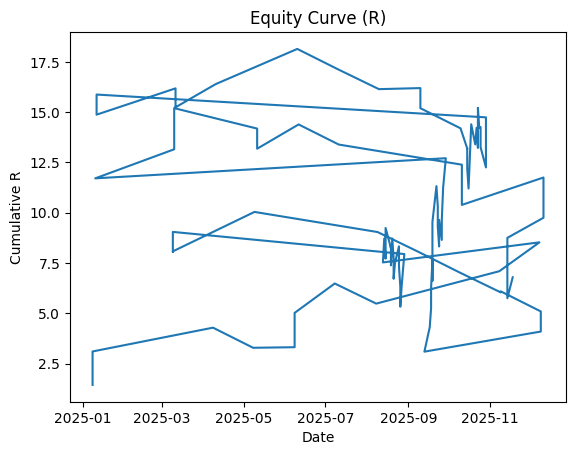

In [40]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df["date"], df["equity_curve"])
plt.title("Equity Curve (R)")
plt.xlabel("Date")
plt.ylabel("Cumulative R")
plt.show()

In [41]:

df["date"] = pd.to_datetime(df["date"])


df = df.sort_values("date").reset_index(drop=True)


df["equity_curve"] = df["r_result"].cumsum()


df[["date", "r_result", "equity_curve"]].head(10)

,date,r_result,equity_curve
0,2025-01-08,1.441176,1.441176
1,2025-01-08,1.663551,3.104728
2,2025-01-10,-1.000000,2.104728
3,2025-01-11,1.133333,3.238061
4,2025-01-11,-1.000000,2.238061
5,2025-03-09,0.033708,2.271769
6,2025-03-09,1.100840,3.372609
7,2025-03-09,-1.000000,2.372609
8,2025-03-10,1.444444,3.817054
9,2025-03-10,2.049632,5.866686


In [42]:
import pandas as pd

raw = pd.read_csv("trades_raw.csv")
raw[["date"]].head(10)

,date
0,1/8/2025
1,1/8/2025
2,4/8/2025
3,5/8/2025
4,6/8/2025
5,6/8/2025
6,7/8/2025
7,8/8/2025
8,11/8/2025
9,12/8/2025


In [43]:
df = raw.copy()

df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

df = df.dropna(subset=["date"]).reset_index(drop=True)

df["equity_curve"] = df["r_result"].cumsum()

df[["date", "r_result", "equity_curve"]].head(10)

,date,r_result,equity_curve
0,2025-08-01,1.441176,1.441176
1,2025-08-01,1.663551,3.104728
2,2025-08-04,1.183099,4.287826
3,2025-08-05,-1.000000,3.287826
4,2025-08-06,0.028571,3.316398
5,2025-08-06,1.705882,5.022280
6,2025-08-07,1.461538,6.483819
7,2025-08-08,-1.000000,5.483819
8,2025-08-11,1.611111,7.094930
9,2025-08-12,1.436364,8.531293


In [44]:
df["date"].min(), df["date"].max(), len(df)

(Timestamp('2025-08-01 00:00:00'), Timestamp('2025-11-12 00:00:00'), 45)

In [45]:
import pandas as pd

raw = pd.read_csv("trades_raw.csv")

d1 = pd.to_datetime(raw["date"], dayfirst=True, errors="coerce")

d2 = pd.to_datetime(raw["date"], dayfirst=False, errors="coerce")

df = raw.copy()
df["date"] = d1.fillna(d2)

df = df.dropna(subset=["date"]).reset_index(drop=True)

print("Final row count:", len(df))
df["date"].min(), df["date"].max()

Final row count: 99


(Timestamp('2025-08-01 00:00:00'), Timestamp('2025-11-18 00:00:00'))

In [46]:

df = df.sort_values("date").reset_index(drop=True)


df["equity_curve"] = df["r_result"].cumsum()


df[["date", "r_result", "equity_curve"]].head(10)

,date,r_result,equity_curve
0,2025-08-01,1.441176,1.441176
1,2025-08-01,1.663551,3.104728
2,2025-08-04,1.183099,4.287826
3,2025-08-05,-1.000000,3.287826
4,2025-08-06,0.028571,3.316398
5,2025-08-06,1.705882,5.022280
6,2025-08-07,1.461538,6.483819
7,2025-08-08,-1.000000,5.483819
8,2025-08-11,1.611111,7.094930
9,2025-08-12,1.436364,8.531293


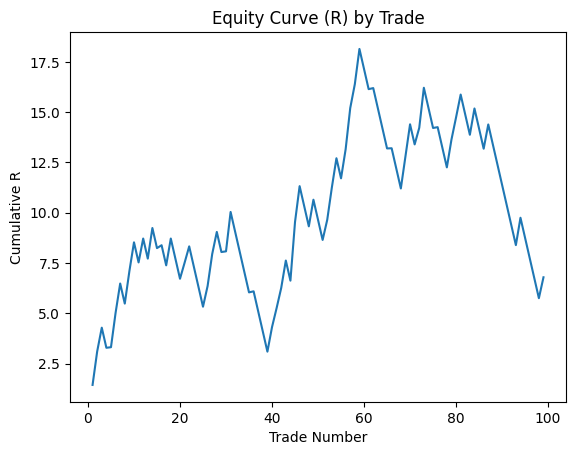

In [47]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df.index + 1, df["equity_curve"])
plt.title("Equity Curve (R) by Trade")
plt.xlabel("Trade Number")
plt.ylabel("Cumulative R")
plt.show()

In [48]:
print("Final row count:", len(df))
df["date"].min(), df["date"].max()

Final row count: 99


(Timestamp('2025-08-01 00:00:00'), Timestamp('2025-11-18 00:00:00'))

In [49]:

df = df.sort_values("date").reset_index(drop=True)

df["equity_curve"] = df["r_result"].cumsum()

df[["date", "r_result", "equity_curve"]].head(10)

,date,r_result,equity_curve
0,2025-08-01,1.441176,1.441176
1,2025-08-01,1.663551,3.104728
2,2025-08-04,1.183099,4.287826
3,2025-08-05,-1.000000,3.287826
4,2025-08-06,0.028571,3.316398
5,2025-08-06,1.705882,5.022280
6,2025-08-07,1.461538,6.483819
7,2025-08-08,-1.000000,5.483819
8,2025-08-11,1.611111,7.094930
9,2025-08-12,1.436364,8.531293


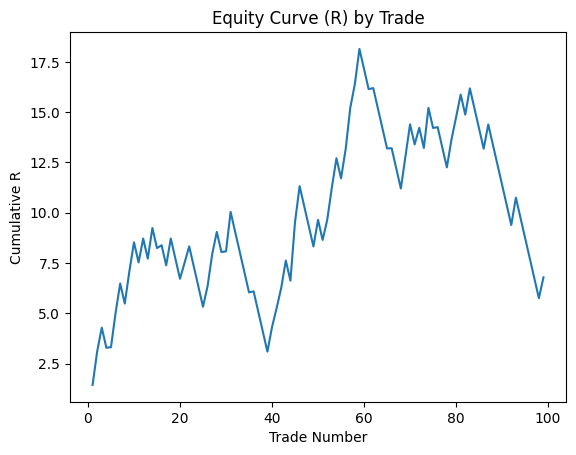

In [50]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df.index + 1, df["equity_curve"])
plt.title("Equity Curve (R) by Trade")
plt.xlabel("Trade Number")
plt.ylabel("Cumulative R")
plt.show()

In [51]:
total_trades = len(df)
win_rate = (df["r_result"] > 0).mean()

avg_win = df.loc[df["r_result"] > 0, "r_result"].mean()
avg_loss = df.loc[df["r_result"] < 0, "r_result"].mean()

expectancy = (win_rate * avg_win) + ((1 - win_rate) * avg_loss)

equity = df["equity_curve"]
running_max = equity.cummax()
drawdown = equity - running_max
max_drawdown = drawdown.min()

print("Total trades:", total_trades)
print("Win rate:", round(win_rate, 3))
print("Avg win:", round(avg_win, 3))
print("Avg loss:", round(avg_loss, 3))
print("Expectancy (R):", round(expectancy, 3))
print("Max drawdown (R):", round(max_drawdown, 3))

Total trades: 99
Win rate: 0.485
Avg win: 1.204
Avg loss: -1.0
Expectancy (R): 0.069
Max drawdown (R): -12.393


In [52]:
df.columns

Index(['date', 'Unnamed: 1', 'bias', 'reason_for_entry', 'instrument',
       'entry_price', 'stop_price', 'target_price', 'exit_price', 'r_result',
       'equity_r', 'notes', 'WIN RATE:', '0.49', 'equity_curve'],
      dtype='object')

In [53]:
df["month"] = df["date"].dt.to_period("M").astype(str)

In [54]:

df["win_flag"] = (df["r_result"] > 0).astype(int)

df["month"] = df["date"].dt.to_period("M").astype(str)

df[["date", "r_result", "win_flag", "month"]].head()

,date,r_result,win_flag,month
0,2025-08-01,1.441176,1,2025-08
1,2025-08-01,1.663551,1,2025-08
2,2025-08-04,1.183099,1,2025-08
3,2025-08-05,-1.000000,0,2025-08
4,2025-08-06,0.028571,1,2025-08


In [55]:
monthly = (
    df.groupby("month")
      .agg(
          trades=("r_result", "count"),
          total_R=("r_result", "sum"),
          win_rate=("win_flag", "mean"),
          avg_R=("r_result", "mean")
      )
      .reset_index()
)

monthly

,month,trades,total_R,win_rate,avg_R
0,2025-08,27,7.947845,0.592593,0.294365
1,2025-09,27,4.764191,0.518519,0.176452
2,2025-10,26,2.032568,0.500000,0.078176
3,2025-11,19,-7.951916,0.263158,-0.418522


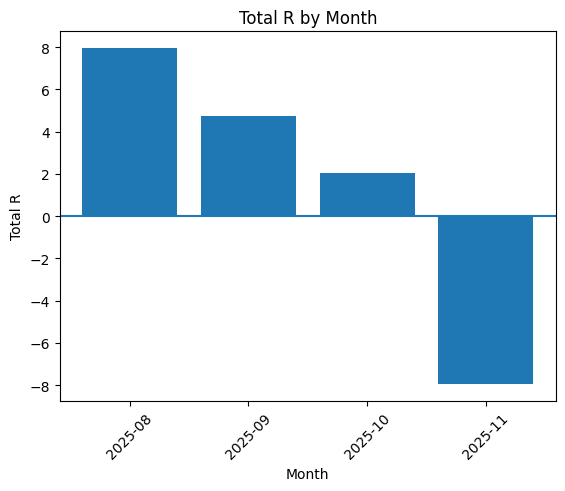

In [56]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(monthly["month"], monthly["total_R"])
plt.title("Total R by Month")
plt.xlabel("Month")
plt.ylabel("Total R")
plt.xticks(rotation=45)
plt.axhline(0)
plt.show()

In [57]:
bad_month = monthly.loc[monthly["total_R"].idxmin(), "month"]
bad_month

'2025-11'

In [58]:
df_bad = df[df["month"] == bad_month]
df_good = df[df["month"] != bad_month]

len(df_bad), len(df_good)

(19, 80)

In [59]:
inst_bad = (
    df_bad.groupby("instrument")
          .agg(
              trades=("r_result", "count"),
              total_R=("r_result", "sum"),
              avg_R=("r_result", "mean"),
              win_rate=("win_flag", "mean")
          )
          .reset_index()
)

inst_bad

,instrument,trades,total_R,avg_R,win_rate
0,ES,12,-3.313618,-0.276135,0.333333
1,NQ,7,-4.638298,-0.662614,0.142857


In [60]:

df["win_flag"] = (df["r_result"] > 0).astype(int)


df["day_of_week"] = df["date"].dt.day_name()


df["month"] = df["date"].dt.to_period("M").astype(str)

df[["date", "day_of_week", "month", "r_result"]].head()

,date,day_of_week,month,r_result
0,2025-08-01,Friday,2025-08,1.441176
1,2025-08-01,Friday,2025-08,1.663551
2,2025-08-04,Monday,2025-08,1.183099
3,2025-08-05,Tuesday,2025-08,-1.000000
4,2025-08-06,Wednesday,2025-08,0.028571


In [61]:
bad_month = monthly.loc[monthly["total_R"].idxmin(), "month"]

df_bad = df[df["month"] == bad_month]
df_good = df[df["month"] != bad_month]

bad_month, len(df_bad), len(df_good)

('2025-11', 19, 80)

In [62]:
dow_bad = (
    df_bad.groupby("day_of_week")
          .agg(
              trades=("r_result", "count"),
              total_R=("r_result", "sum"),
              avg_R=("r_result", "mean"),
              win_rate=("win_flag", "mean")
          )
          .reset_index()
)

dow_bad

,day_of_week,trades,total_R,avg_R,win_rate
0,Friday,5,-5.000000,-1.000000,0.0
1,Monday,5,-2.692308,-0.538462,0.2
2,Saturday,2,0.133333,0.066667,0.5
3,Thursday,1,1.205882,1.205882,1.0
4,Tuesday,1,1.039474,1.039474,1.0
5,Wednesday,5,-2.638298,-0.527660,0.2


In [63]:
inst_bad = (
    df_bad.groupby("instrument")
          .agg(
              trades=("r_result", "count"),
              total_R=("r_result", "sum"),
              avg_R=("r_result", "mean"),
              win_rate=("win_flag", "mean")
          )
          .reset_index()
)

inst_bad

,instrument,trades,total_R,avg_R,win_rate
0,ES,12,-3.313618,-0.276135,0.333333
1,NQ,7,-4.638298,-0.662614,0.142857


In [64]:
daily_bad = (
    df_bad.groupby("date")
          .agg(
              trades=("r_result", "count"),
              total_R=("r_result", "sum")
          )
          .reset_index()
)

daily_bad.sort_values("trades", ascending=False).head(10)

,date,trades,total_R
7,2025-11-14,4,-4.000000
6,2025-11-12,3,-0.638298
5,2025-11-10,3,-3.000000
0,2025-11-01,2,0.133333
1,2025-11-03,2,0.307692
2,2025-11-05,2,-2.000000
3,2025-11-06,1,1.205882
4,2025-11-07,1,-1.000000
8,2025-11-18,1,1.039474


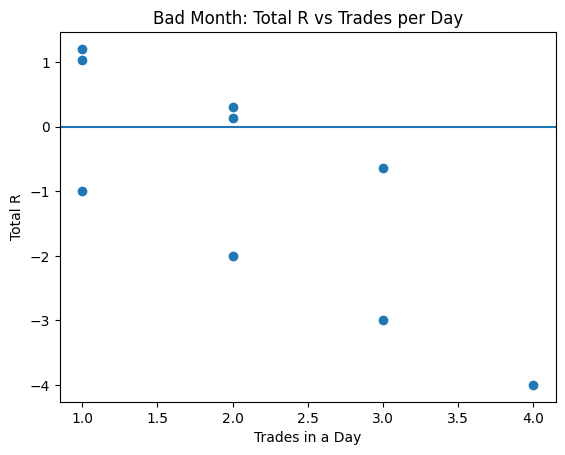

In [65]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(daily_bad["trades"], daily_bad["total_R"])
plt.title("Bad Month: Total R vs Trades per Day")
plt.xlabel("Trades in a Day")
plt.ylabel("Total R")
plt.axhline(0)
plt.show()

In [66]:
bucket = (
    daily_bad.groupby("trades")
             .agg(
                 days=("total_R", "count"),
                 avg_daily_R=("total_R", "mean"),
                 total_R=("total_R", "sum")
             )
             .reset_index()
)

bucket

,trades,days,avg_daily_R,total_R
0,1,3,0.415119,1.245356
1,2,3,-0.519658,-1.558974
2,3,2,-1.819149,-3.638298
3,4,1,-4.000000,-4.000000


In [67]:
df = df.sort_values("date").reset_index(drop=True)

In [68]:
df_cap2 = (
    df.groupby("date", group_keys=False)
      .head(2)
      .reset_index(drop=True)
)

df_cap2["equity_curve"] = df_cap2["r_result"].cumsum()

In [69]:
df_cap1 = (
    df.groupby("date", group_keys=False)
      .head(1)
      .reset_index(drop=True)
)

df_cap1["equity_curve"] = df_cap1["r_result"].cumsum()

In [70]:
def summary_stats(data, name):
    total_trades = len(data)
    win_rate = (data["r_result"] > 0).mean()
    total_R = data["r_result"].sum()

    equity = data["equity_curve"]
    running_max = equity.cummax()
    drawdown = equity - running_max
    max_dd = drawdown.min()

    return {
        "version": name,
        "trades": total_trades,
        "total_R": round(total_R, 3),
        "win_rate": round(win_rate, 3),
        "max_drawdown": round(max_dd, 3)
    }

stats = [
    summary_stats(df, "Original"),
    summary_stats(df_cap2, "2 trades/day cap"),
    summary_stats(df_cap1, "1 trade/day cap")
]

pd.DataFrame(stats)

,version,trades,total_R,win_rate,max_drawdown
0,Original,99,6.793,0.485,-12.393
1,2 trades/day cap,90,8.736,0.500,-8.499
2,1 trade/day cap,63,12.900,0.540,-6.000


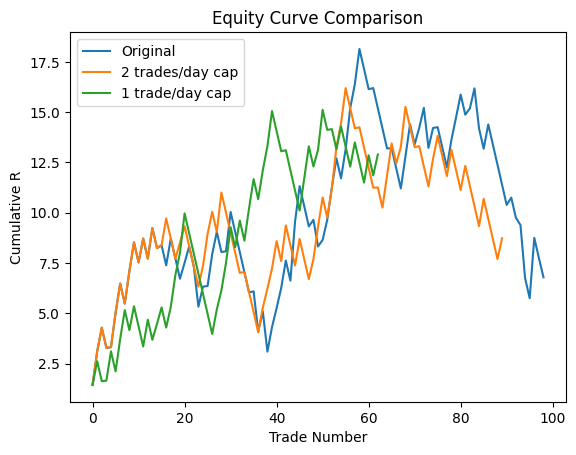

In [71]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df["equity_curve"], label="Original")
plt.plot(df_cap2["equity_curve"], label="2 trades/day cap")
plt.plot(df_cap1["equity_curve"], label="1 trade/day cap")

plt.title("Equity Curve Comparison")
plt.xlabel("Trade Number")
plt.ylabel("Cumulative R")
plt.legend()
plt.show()

In [72]:
df.head()

,date,Unnamed: 1,bias,reason_for_entry,instrument,entry_price,stop_price,target_price,exit_price,r_result,equity_r,notes,WIN RATE:,0.49,equity_curve,month,win_flag,day_of_week
0,2025-08-01,#VALUE!,neutral,"SMT of data lows, IFVG, DOL",ES,6310.75,6302.25,6323.00,6323.0,1.441176,1.441176,good trade following strategy,TOTAL TRADES:,100,1.441176,2025-08,1,Friday
1,2025-08-01,NaN,bearish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23120.50,23174.00,23031.50,23031.5,1.663551,1.663551,good trade following strategy and risk managem...,TOTAL R:,8.213739846,3.104728,2025-08,1,Friday
2,2025-08-04,NaN,bullish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23057.00,23039.25,23078.00,23078.0,1.183099,1.183099,good trade following strategy,MAX DRAWDOWN (R):,-6,4.287826,2025-08,1,Monday
3,2025-08-05,NaN,bullish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23385.75,23326.00,23462.00,23326.0,-1.000000,-1.000000,"systematic loss, still followed strategy",100-TRADE COMPLETION:,100/100,3.287826,2025-08,0,Tuesday
4,2025-08-06,NaN,neutral,"SMT divergence, HTF imbalance, IFVG, targeting...",ES,6324.25,6315.50,6345.75,6324.5,0.028571,0.028571,stopped out break even after internal highs we...,100-TRADE PROGRESS:,1,3.316398,2025-08,1,Wednesday


In [73]:
df = df.drop(columns=["Unnamed: 1"], errors="ignore")

In [74]:
df.head()

,date,bias,reason_for_entry,instrument,entry_price,stop_price,target_price,exit_price,r_result,equity_r,notes,WIN RATE:,0.49,equity_curve,month,win_flag,day_of_week
0,2025-08-01,neutral,"SMT of data lows, IFVG, DOL",ES,6310.75,6302.25,6323.00,6323.0,1.441176,1.441176,good trade following strategy,TOTAL TRADES:,100,1.441176,2025-08,1,Friday
1,2025-08-01,bearish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23120.50,23174.00,23031.50,23031.5,1.663551,1.663551,good trade following strategy and risk managem...,TOTAL R:,8.213739846,3.104728,2025-08,1,Friday
2,2025-08-04,bullish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23057.00,23039.25,23078.00,23078.0,1.183099,1.183099,good trade following strategy,MAX DRAWDOWN (R):,-6,4.287826,2025-08,1,Monday
3,2025-08-05,bullish,"Bias, SMT divergence of HTF imbalance, IFVG, DOL",NQ,23385.75,23326.00,23462.00,23326.0,-1.000000,-1.000000,"systematic loss, still followed strategy",100-TRADE COMPLETION:,100/100,3.287826,2025-08,0,Tuesday
4,2025-08-06,neutral,"SMT divergence, HTF imbalance, IFVG, targeting...",ES,6324.25,6315.50,6345.75,6324.5,0.028571,0.028571,stopped out break even after internal highs we...,100-TRADE PROGRESS:,1,3.316398,2025-08,1,Wednesday


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              99 non-null     datetime64[ns]
 1   bias              99 non-null     object        
 2   reason_for_entry  99 non-null     object        
 3   instrument        99 non-null     object        
 4   entry_price       99 non-null     float64       
 5   stop_price        99 non-null     float64       
 6   target_price      99 non-null     float64       
 7   exit_price        99 non-null     float64       
 8   r_result          99 non-null     float64       
 9   equity_r          99 non-null     float64       
 10  notes             99 non-null     object        
 11  WIN RATE:         5 non-null      object        
 12  0.49              5 non-null      object        
 13  equity_curve      99 non-null     float64       
 14  month             99 non-nul

In [76]:
df = df.dropna(how="all")

In [77]:
df.to_csv("trades_clean.csv", index=False)

In [78]:
df.to_csv("trades_clean.csv", index=False)
print("Saved!")

Saved!


In [79]:

base = df.copy()


base["date"] = pd.to_datetime(base["date"])

base["trades_per_day"] = base.groupby("date")["date"].transform("count")


orig = base.copy()
orig["version"] = "Original"


cap2 = base[base["trades_per_day"] <= 2].copy()
cap2["version"] = "2 trades/day cap"


cap1 = base[base["trades_per_day"] <= 1].copy()
cap1["version"] = "1 trade/day cap"


orig.to_csv("trades_original.csv", index=False)
cap2.to_csv("trades_2cap.csv", index=False)
cap1.to_csv("trades_1cap.csv", index=False)

print("Exported 3 files!")

Exported 3 files!


In [80]:
from google.colab import files

files.download("trades_original.csv")
files.download("trades_2cap.csv")
files.download("trades_1cap.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>